In [33]:
# Import Liberies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import joblib
import shap
from PIL import Image
import PIL

## 1. Load Dataset

In [34]:
df = pd.read_csv("C:\\Users\\ssart\\Downloads\\RTA Dataset.csv")

In [35]:
# Show Dataset
df.head(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,...,U-Turn,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,...,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,U-Turn,na,na,na,na,NaN,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury


## 2. EDA

In [36]:
# Check the information of datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [37]:
# Check Missing value in our datasets
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

### Univariate Analysis

C:\Users\ssart\AppData\Local\Temp\ipykernel_16608\560240611.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))


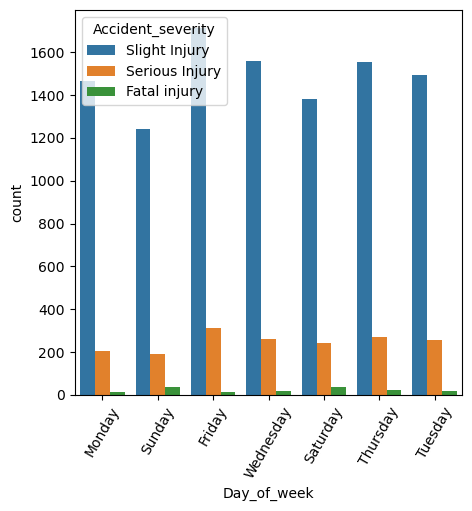

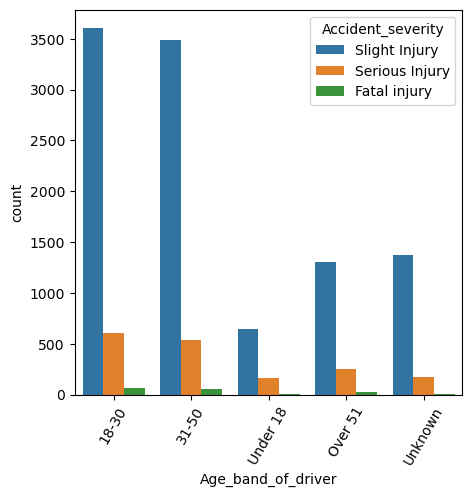

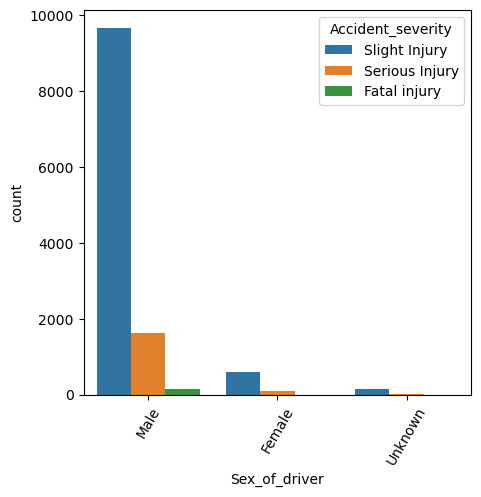

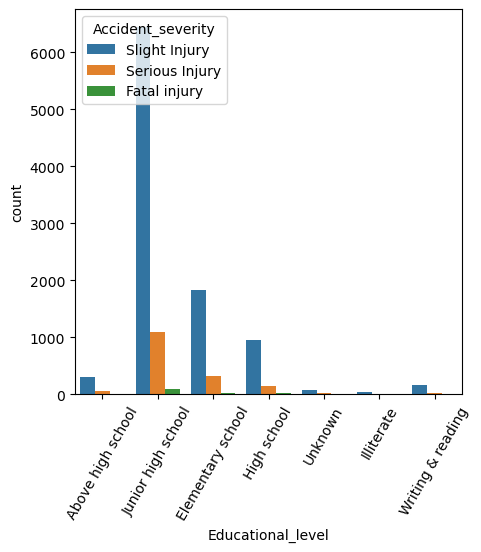

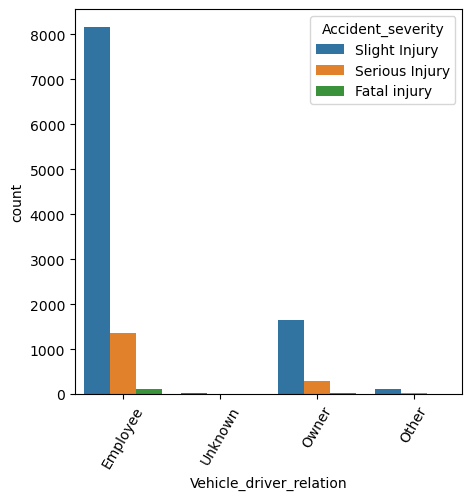

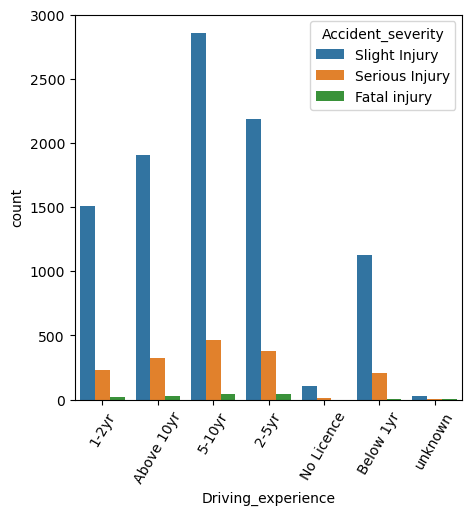

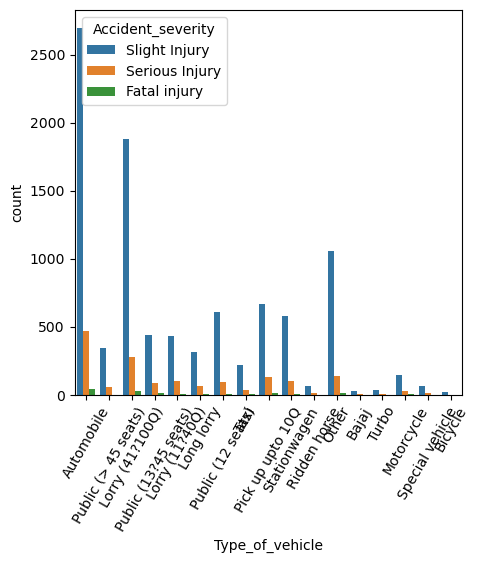

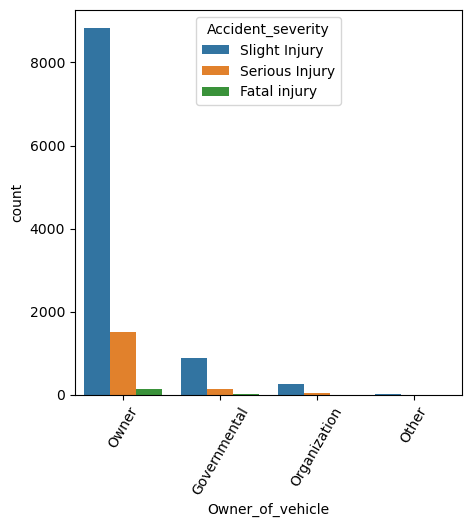

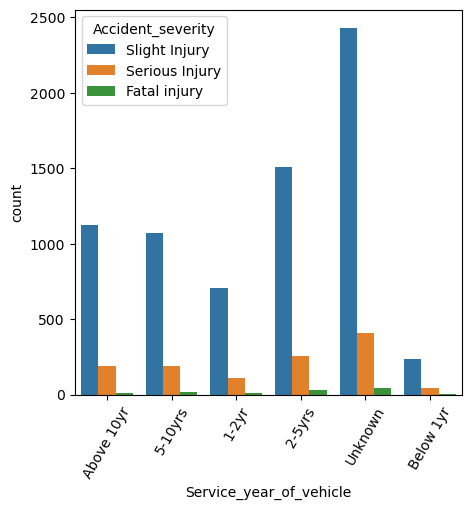

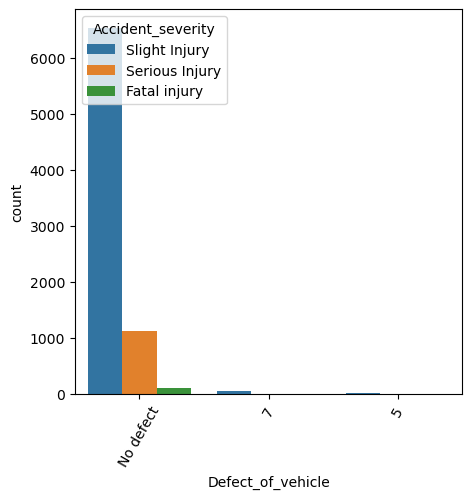

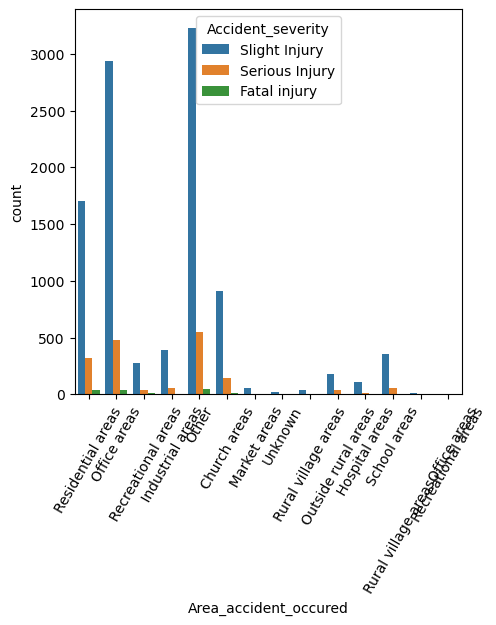

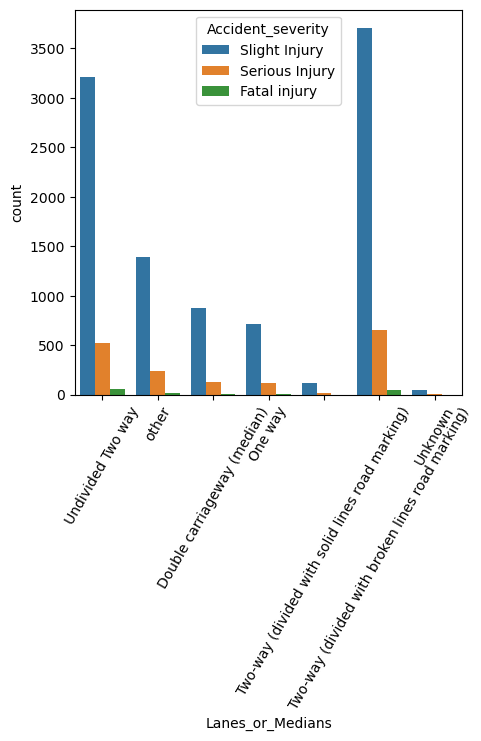

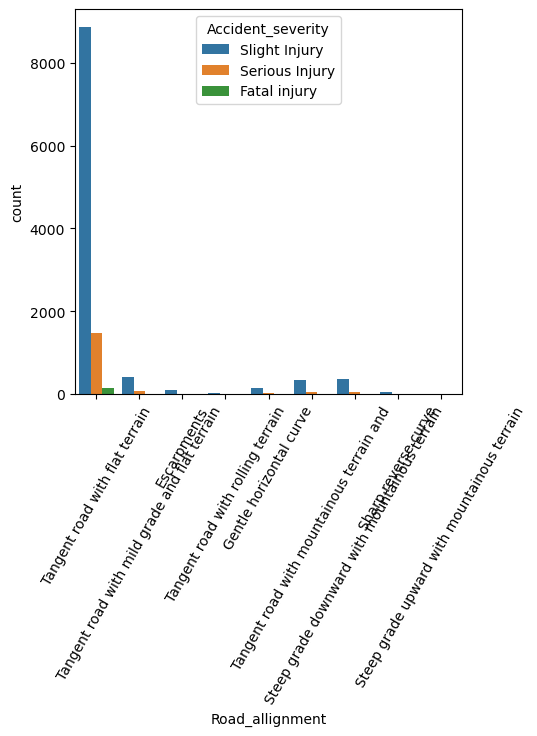

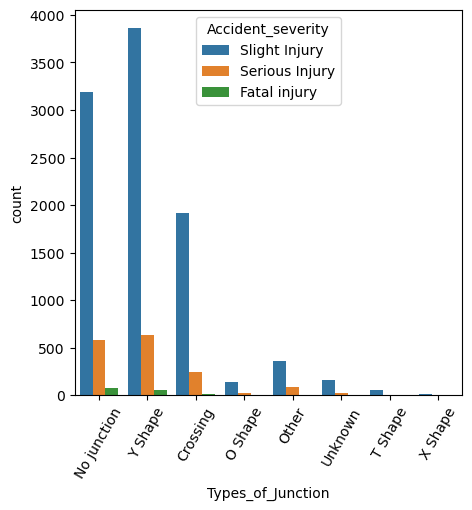

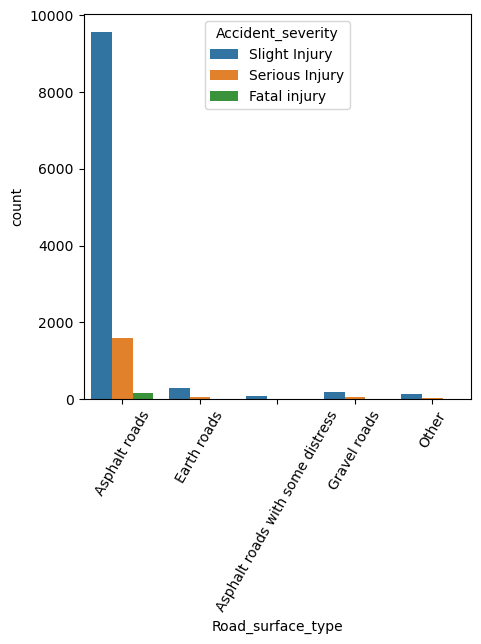

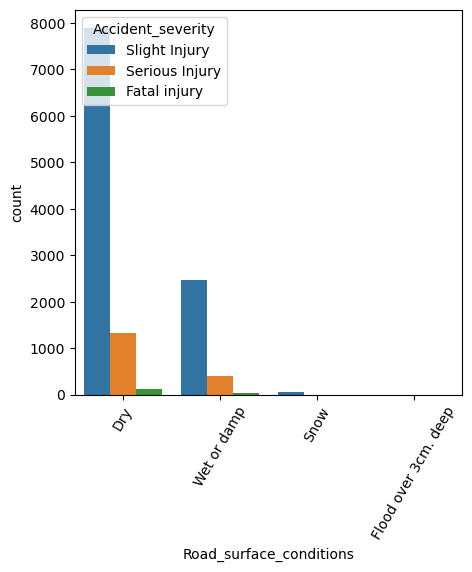

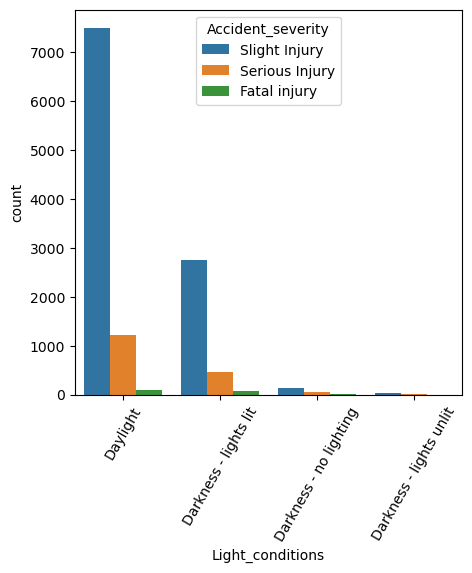

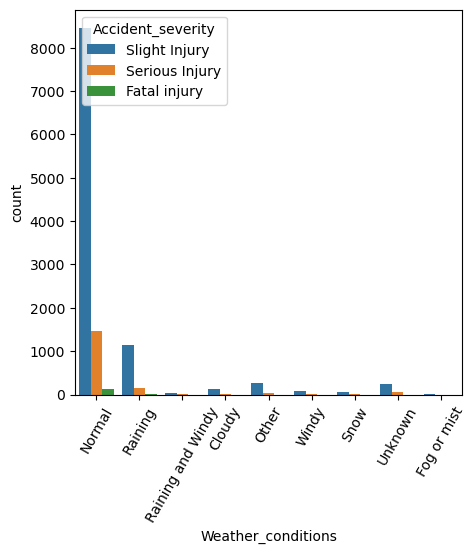

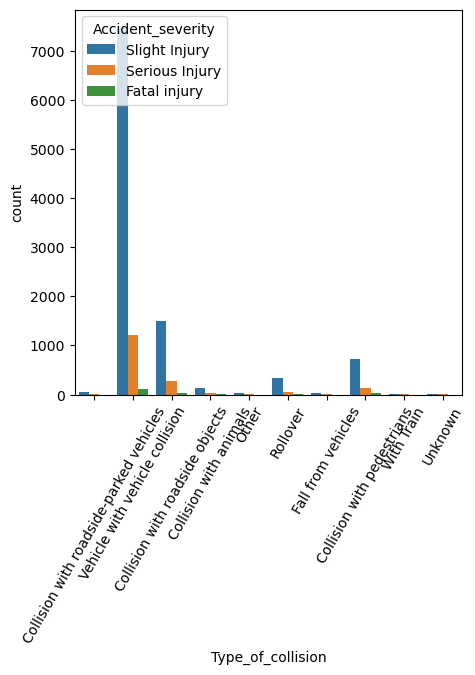

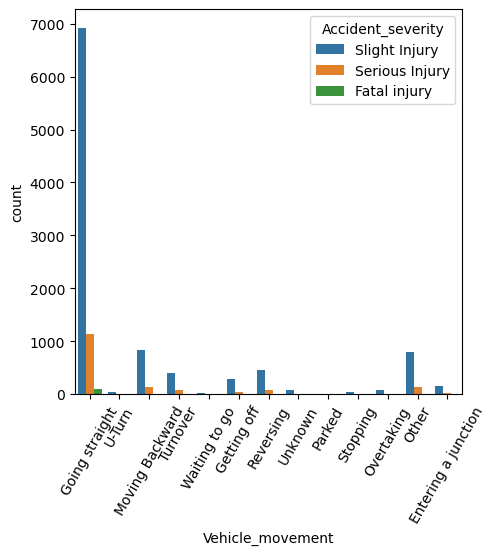

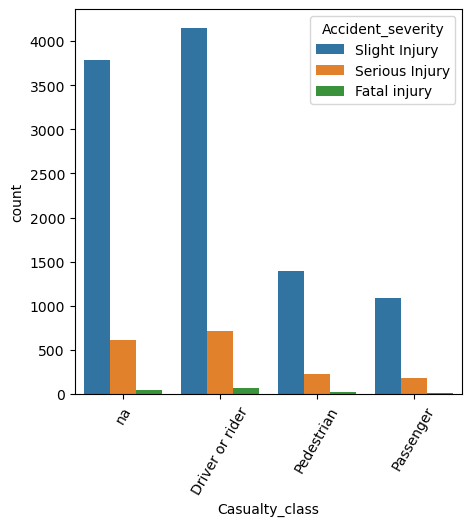

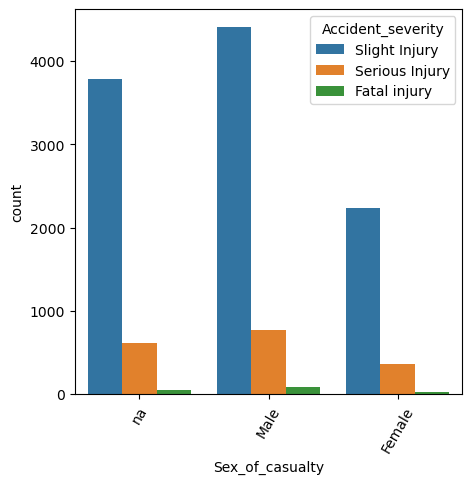

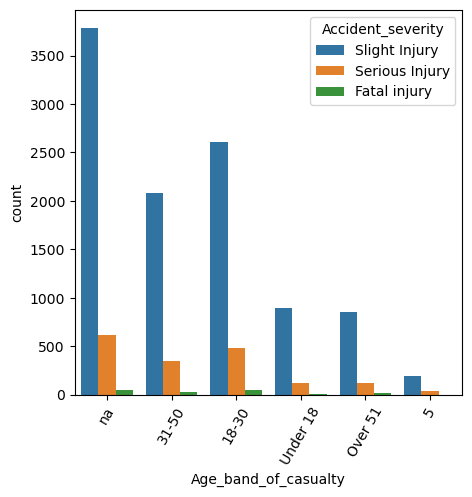

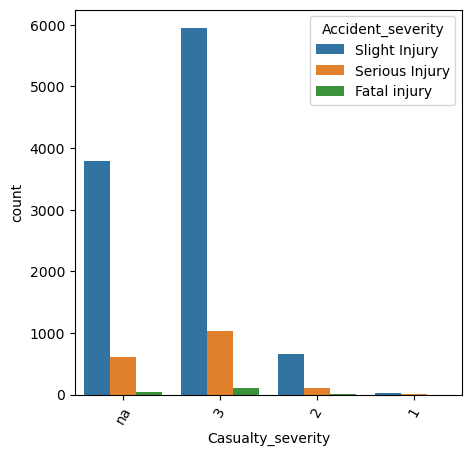

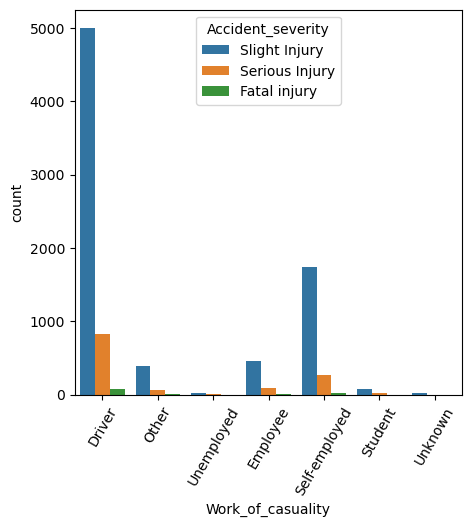

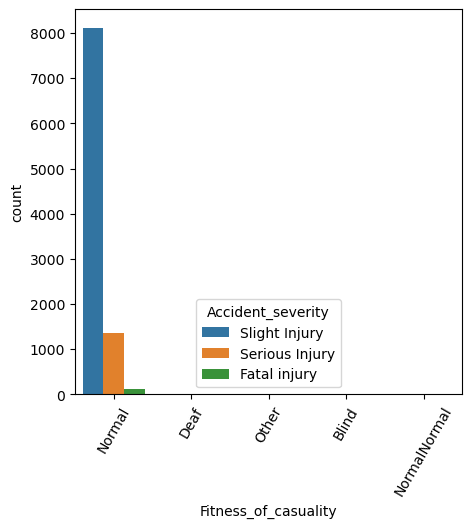

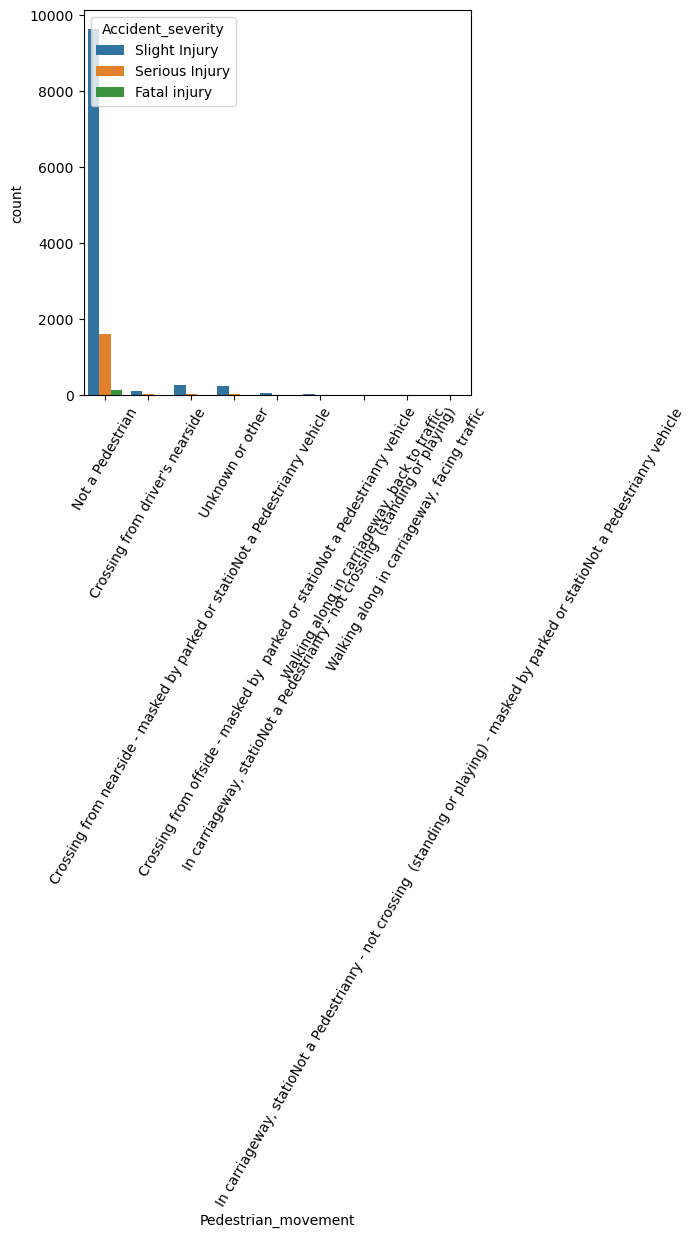

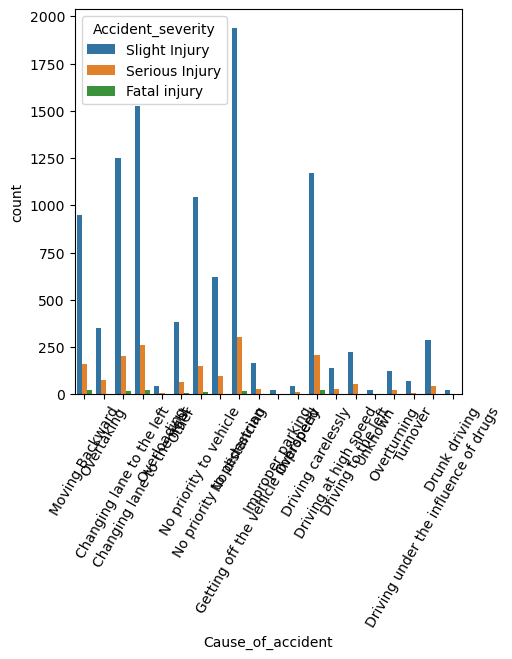

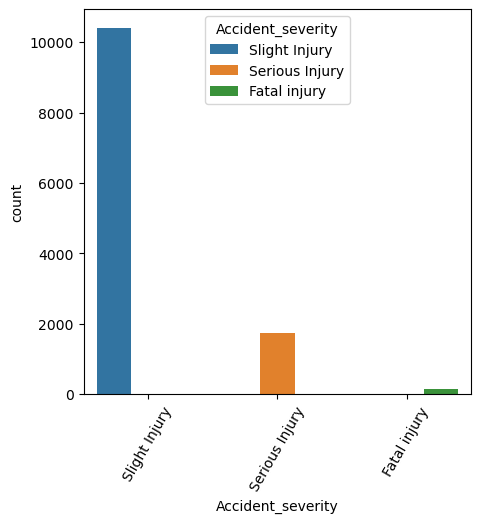

In [38]:
# data visualizationf of categorical cols

def count_plot(col):
    n_df[col].value_counts()
    
    # plot the figure of count plot
    plt.figure(figsize=(5,5))
    sns.countplot(x=col, hue='Accident_severity', data=n_df)
    plt.xlabel(f'{col}')
    plt.xticks(rotation=60)
    plt.show
    
for col in obj_cols:
    count_plot(col)

Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Other                                 167
Asphalt roads with some distress       81
Name: Road_surface_type, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

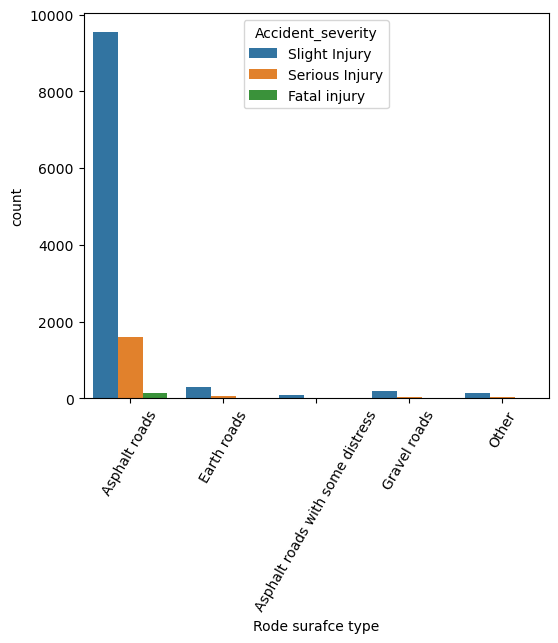

In [39]:

print(df['Road_surface_type'].value_counts())

plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=df)
plt.xlabel('Rode surafce type')
plt.xticks(rotation=60)
plt.show

Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: Road_surface_conditions, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

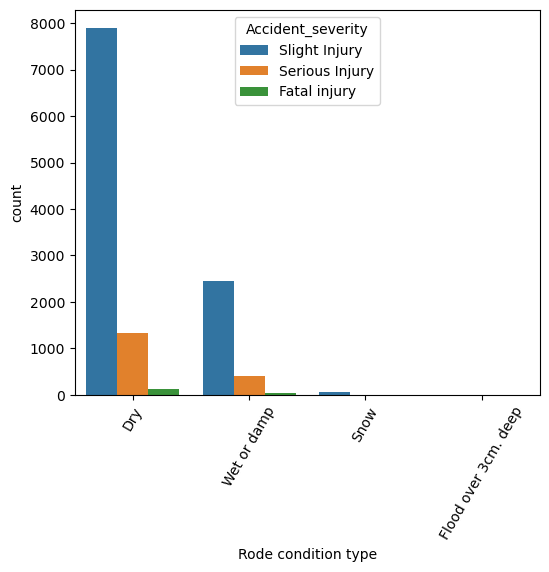

In [40]:
print(df['Road_surface_conditions'].value_counts())

plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_conditions', hue='Accident_severity', data=df)
plt.xlabel('Rode condition type')
plt.xticks(rotation=60)
plt.show

### How does road_surface affact injuries?

In [41]:
pivot_df = pd.pivot_table(data=df, 
               index='Road_surface_conditions', 
               columns='Accident_severity',
               aggfunc='count')

fatal_df = pivot_df['Road_surface_type']
fatal_df.fillna(0, inplace=True)
fatal_df['sum_of_injuries'] = fatal_df['Fatal injury'] + fatal_df['Serious Injury'] + fatal_df['Slight Injury']
fatal_df

C:\Users\ssart\AppData\Local\Temp\ipykernel_16608\2328845152.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatal_df.fillna(0, inplace=True)
C:\Users\ssart\AppData\Local\Temp\ipykernel_16608\2328845152.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatal_df['sum_of_injuries'] = fatal_df['Fatal injury'] + fatal_df['Serious Injury'] + fatal_df['Slight Injury']


Accident_severity,Fatal injury,Serious Injury,Slight Injury,sum_of_injuries
Road_surface_conditions,,,,
Dry,121.0,1312.0,7774.0,9207.0
Flood over 3cm. deep,0.0,0.0,2.0,2.0
Snow,0.0,4.0,65.0,69.0
Wet or damp,36.0,404.0,2426.0,2866.0


In [42]:
fatal_df_dry = (fatal_df.loc['Dry']/fatal_df.loc['Dry','sum_of_injuries'])*100
fatal_df_dry

Accident_severity
Fatal injury         1.314217
Serious Injury      14.250027
Slight Injury       84.435755
sum_of_injuries    100.000000
Name: Dry, dtype: float64

In [43]:
fatal_df_snow = (fatal_df.loc['Wet or damp']/fatal_df.loc['Wet or damp','sum_of_injuries'])*100
fatal_df_snow

Accident_severity
Fatal injury         1.256106
Serious Injury      14.096301
Slight Injury       84.647592
sum_of_injuries    100.000000
Name: Wet or damp, dtype: float64

In [44]:
df.groupby('Road_surface_conditions')['Accident_severity'].count()

Road_surface_conditions
Dry                     9340
Flood over 3cm. deep       2
Snow                      70
Wet or damp             2904
Name: Accident_severity, dtype: int64

## 3. Data Preprocessing 

In [45]:
# Check unique Value in Datasets
categorical_columns = df.select_dtypes(include=['object', 'category'])
for feature in categorical_columns:
    print(f"Column: {feature} -> {df[feature].unique()}")
    print(f"Unique Number: {df[feature].nunique()}")
    print(f"{df[feature].value_counts()} \n")

Column: Time -> ['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
Unique Number: 1074
15:30:00    120
17:10:00    110
18:30:00    103
11:30:00     99
17:00:00     98
           ... 
19:04:00      1
20:36:00      1
22:54:00      1
21:03:00      1
2:47:00       1
Name: Time, Length: 1074, dtype: int64 

Column: Day_of_week -> ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
Unique Number: 7
Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: Day_of_week, dtype: int64 

Column: Age_band_of_driver -> ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
Unique Number: 5
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: Age_band_of_driver, dtype: int64 

Column: Sex_of_driver -> ['Male' 'Female' 'Unknown']
Unique Number: 3
Male       11437
Female       701
Unknown      178
Name: Sex_of_driver, dtype: int64 

Column: Educational_level 

In [46]:
# convert object type column into datetime datatype column
df['Time'] = pd.to_datetime(df['Time'])

In [47]:
# This code after EDA Perfrom 

In [48]:
obj_cols = [col for col in df.columns if df[col].dtypes == 'object']
obj_cols2 = [col for col in obj_cols if col != 'Accident_severity']
obj_cols2

['Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Work_of_casuality',
 'Fitness_of_casuality',
 'Pedestrian_movement',
 'Cause_of_accident']

In [49]:
# Extrating 'Hour_of_Day' feature from the Time column
new_df =df.copy()

In [50]:
new_df['Hour_of_Day'] = new_df['Time'].dt.hour
n_df = new_df.drop('Time',axis = 1)
n_df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1


### Handled Missing Value

In [51]:
# feature selection based on visualization (to_be_continue)
features = ['Day_of_week','Number_of_vehicles_involved','Number_of_casualties','Area_accident_occured',
           'Types_of_Junction','Age_band_of_driver','Sex_of_driver','Educational_level',
           'Vehicle_driver_relation','Type_of_vehicle','Driving_experience','Service_year_of_vehicle','Type_of_collision',
           'Sex_of_casualty','Age_band_of_casualty','Cause_of_accident','Hour_of_Day']
len(features)



17

In [52]:
# new dataframe generated
featureset_df = n_df[features]
target = n_df['Accident_severity']

In [28]:
# meta data of the new sub dataset
featureset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12077 non-null  object
 4   Types_of_Junction            11429 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            11575 non-null  object
 8   Vehicle_driver_relation      11737 non-null  object
 9   Type_of_vehicle              11366 non-null  object
 10  Driving_experience           11487 non-null  object
 11  Service_year_of_vehicle      8388 non-null   object
 12  Type_of_collision            12161 non-null  object
 13  Sex_of_casualty              12

In [54]:
feature_df = featureset_df.copy()

In [55]:
# NaN are missing because service info might not be available, we will fill as 'Unknowns'
feature_df['Educational_level'] =feature_df['Educational_level'].fillna('Unknown')
feature_df['Vehicle_driver_relation'] =feature_df['Vehicle_driver_relation'].fillna('Unknown')
feature_df['Driving_experience'] = feature_df['Driving_experience'].fillna('Unknown')
feature_df['Type_of_vehicle'] = feature_df['Type_of_vehicle'].fillna('Unknown')
feature_df['Service_year_of_vehicle'] = feature_df['Service_year_of_vehicle'].fillna('Unknown')
feature_df['Area_accident_occured'] = feature_df['Area_accident_occured'].fillna('Unknown')
feature_df['Educational_level'] = feature_df['Educational_level'].fillna('Unknown')
feature_df['Type_of_collision'] = feature_df['Type_of_collision'].fillna('Unknown')
feature_df['Types_of_Junction'] =feature_df['Types_of_Junction'].fillna('Unknown')

In [56]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12316 non-null  object
 4   Types_of_Junction            12316 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            12316 non-null  object
 8   Vehicle_driver_relation      12316 non-null  object
 9   Type_of_vehicle              12316 non-null  object
 10  Driving_experience           12316 non-null  object
 11  Service_year_of_vehicle      12316 non-null  object
 12  Type_of_collision            12316 non-null  object
 13  Sex_of_casualty              12

## 4. One-Hot encoding

In [57]:
# setting input features X and target y 
X = feature_df[features]  
y = target

# we will use pandas get_dummies method for on-hot encoding
encoded_df = pd.get_dummies(X, drop_first=True)
encoded_df.shape


(12316, 108)

In [106]:
encoded_df

,Number_of_vehicles_involved,Number_of_casualties,Hour_of_Day,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Area_accident_occured_ Recreational areas,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,2,2,17,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,17,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,2,17,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,2,1,16,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
12312,2,1,18,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12313,1,1,13,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12314,2,1,13,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5. Target encoding using ‘LabelEncoder

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
# Initialize model
lb = LabelEncoder()

In [60]:
# fit the model on Y taget Colunm
lb.fit(y)

LabelEncoder()

In [61]:
y_encoded = lb.transform(y)
print("Encode labels :" ,lb.classes_)
y_en = pd.Series(y_encoded)

Encode labels : ['Fatal injury' 'Serious Injury' 'Slight Injury']


## 6. Feature selection using k Best ‘Chi2’  Method

In [62]:
from sklearn.feature_selection import SelectKBest , chi2

In [63]:
## mutual info classif to check informative features
mi_calc = mutual_info_classif(encoded_df, y_en, random_state=42)

In [64]:
mi_df = pd.DataFrame({'Columns':encoded_df.columns, 'MI_score':mi_calc})
mi_df.sort_values(by='MI_score',ascending=False).head(15)

,Columns,MI_score
63,Driving_experience_Above 10yr,0.008694
28,Types_of_Junction_Y Shape,0.008422
0,Number_of_vehicles_involved,0.008023
40,Educational_level_Writing & reading,0.006965
73,Type_of_collision_Collision with pedestrians,0.006591
88,Age_band_of_casualty_na,0.006188
1,Number_of_casualties,0.006144
2,Hour_of_Day,0.005917
38,Educational_level_Junior high school,0.005559
82,Sex_of_casualty_Male,0.005458


In [65]:
# feature seleciton method using chi2 for categorical output, categorical input
fs = SelectKBest(chi2, k=50)
X_new = fs.fit_transform(encoded_df, y_en)
X_new.shape
cols = fs.get_feature_names_out()

In [66]:
# convert selected features into dataframe
fs_df = pd.DataFrame(X_new, columns=cols)

### PCA

In [67]:
pca = PCA(n_components=3)
pca.fit(encoded_df)

X_pca = pca.transform(encoded_df)

# 3 components PCA algorithm
components = pca.components_

pca_df = pd.DataFrame(X_pca, columns={'PC1','PC2','PC3'})
pca_df.var()

PC1    27.074668
PC3     1.054307
PC2     0.630347
dtype: float64

## 7. Imbalance data treatment using the ‘SMOTENC’ technique

In [59]:
# importing the SMOTENC object from imblearn library 
from imblearn.over_sampling import SMOTENC

In [68]:
# Create a boolean mask for categorical features
n_cat_index = np.array(range(3,50))

smote = SMOTENC(categorical_features=n_cat_index, random_state=42, n_jobs=True)
X_n, y_n = smote.fit_resample(fs_df,y_en)
X_n.shape, y_n.shape

C:\Users\ssart\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:619: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Users\ssart\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:582: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.categorical_features == "auto":
C:\Users\ssart\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


((31245, 50), (31245,))

In [70]:
# print the target classes distribution
y_n.value_counts()

2    10415
1    10415
0    10415
dtype: int64

## 8. Modeling

In [71]:
# train and test split and building baseline model to predict target features
X_trn, X_tst, y_trn, y_tst = train_test_split(X_n, y_n, test_size=0.2, random_state=42)


In [72]:
# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
rf.fit(X_trn, y_trn)

RandomForestClassifier(max_depth=20, n_estimators=800, random_state=42)

In [74]:
# predicting on test data
predics = rf.predict(X_tst)

In [75]:
# train score 
rf.score(X_trn, y_trn)

0.9386301808289327

## 9. Evaluation

In [76]:
# classification report on test dataset
classif_re = classification_report(y_tst,predics)
print(classif_re)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2085
           1       0.82      0.85      0.84      2100
           2       0.86      0.87      0.86      2064

    accuracy                           0.88      6249
   macro avg       0.88      0.88      0.88      6249
weighted avg       0.88      0.88      0.88      6249



In [77]:
# f1_score of the model
f1score = f1_score(y_tst,predics, average='weighted')
print(f1score)

0.8831005634217343


### Deployment using streamlit

In [78]:
# selecting 7 categorical features from the dataframe
import joblib
from sklearn.preprocessing import OrdinalEncoder

new_fea_df = feature_df[['Type_of_collision','Age_band_of_driver','Sex_of_driver',
       'Educational_level','Service_year_of_vehicle','Day_of_week','Area_accident_occured']]

oencoder2 = OrdinalEncoder()
encoded_df3 = pd.DataFrame(oencoder2.fit_transform(new_fea_df))
encoded_df3.columns = new_fea_df.columns

# save the ordinal encoder object for inference pipeline
joblib.dump(oencoder2, "ordinal_encoder2.joblib")

['ordinal_encoder2.joblib']

In [79]:
# final dataframe to be trained for model inference
s_final_df = pd.concat([feature_df[['Number_of_vehicles_involved','Number_of_casualties','Hour_of_Day']],encoded_df3], axis=1)

# train and test split and building baseline model to predict target features
X_trn2, X_tst2, y_trn2, y_tst2 = train_test_split(s_final_df, y_en, test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=700, max_depth=20, random_state=42)
rf.fit(X_trn2, y_trn2)

# save the model object
joblib.dump(rf, "rta_model_deploy3.joblib", compress=9)

['rta_model_deploy3.joblib']